<a href="https://colab.research.google.com/github/ErbolTakhirov/Learning-notebooks/blob/main/statistics/Statistic_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

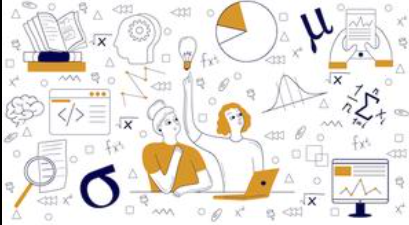

# Additional

## About `np.vectorize(my_function)`

Иногда возникают ситуации, когда нам надо к каждому элементу `np.ndarray` применить какую-либо кастомную написанную нами функцию. Например с python list работает итератор `map`, который "пробегается" по всем элементам списка и к каждому элементу применяет написанную прежде функцию. Есть ли его аналог для numpy? (Использование обычного цикла не является приличным поступком)

Прямого аналога НЕТ. Но, мы можем ВЕКТОРИЗОВАТЬ нашу функцию, и тогда она сможет работать как любой метод numpy поэлементно!




```
      # Например, функция, которую вы хотите применить
def my_function(x):
    # Ваша логика функции
    return x * x

      # Векторизация функции
vectorized_function = np.vectorize(my_function)

      # Создание NumPy массива
arr = np.array([1, 2, 3, 4, 5])

      # Применение векторизованной функции к массиву
result = vectorized_function(arr)
```



In [ ]:
arr = np.arange(20)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Нам дан массив. Заменим все четные числа в нем на число 100. Напишем соответствующую функцию:

In [ ]:
def correct(x:float) -> float:
  if x%2 == 0:
    return 100
  else:
    return x

Векторизуем ее:


In [ ]:
correct = np.vectorize(correct)

Применим

In [ ]:
correct(arr)

array([100,   1, 100,   3, 100,   5, 100,   7, 100,   9, 100,  11, 100,
        13, 100,  15, 100,  17, 100,  19])

# Task_1

Предположим, у нас есть в данных номинативный (категориальный) признак. Он нам дан как список значений. Найдите МОДУ. Сделайте предположение относительно моды визуально оценив данные.

In [ ]:
fruits = ['банан',
          'киви',
          'хурма',
          'банан',
          'банан',
          'лимон',
          'банан',
          'апельсин',
          'банан',
          'хурма',
          'киви',
          'банан',
          'яблоко',
          'банан']

In [ ]:
uni_fruits = list(set(fruits))
uni_fruits

['апельсин', 'киви', 'яблоко', 'лимон', 'хурма', 'банан']

In [ ]:
uni_fruits_count = [fruits.count(i) for i in uni_fruits]
uni_fruits_count

[1, 2, 1, 1, 2, 7]

In [ ]:
uni_fruits[uni_fruits_count.index(max(uni_fruits_count))]

'банан'

# Task_2

У нас есть массив с наблюдениями. В нем значения заработной платы граждан Кыргызской Республики.
* Вычислите медиану на бумаге.
* Вычислите среднее арифметическое и медиану функциями numpy.
* На сколько процентов среднее отклоняется от медианы. Почему их различие столь значимо?
* Для каждого наблюдения вычислите отклонение от среднего. (не абсолютное)

In [ ]:
income = np.array([30000, 35000, 30000, 45000, 50000, 45000, 60000, 55000, 20000, 32000, 700000])

In [ ]:
np.mean(income)

np.float64(100181.81818181818)

In [ ]:
income.sort()

In [ ]:
income

array([ 20000,  30000,  30000,  32000,  35000,  45000,  45000,  50000,
        55000,  60000, 700000])

In [ ]:
np.median(income)

np.float64(45000.0)

In [ ]:
from scipy import stats

In [ ]:
mode, _ = stats.mode(income)

In [ ]:
mode

np.int64(30000)

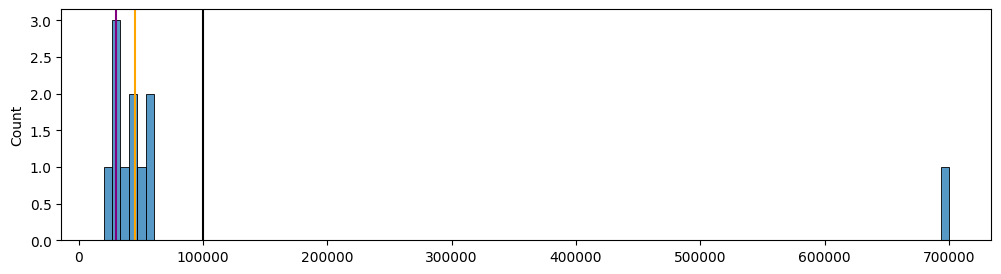

In [ ]:
plt.subplots(figsize=(12, 3))
sns.histplot(income, bins = 100)
plt.axvline(x = np.median(income), color = 'orange')
plt.axvline(x=np.mean(income), color = 'black')
plt.axvline(x=mode, color = 'purple')


In [ ]:
arr = (np.random.randn(500)*90 + 150).round()

In [ ]:
mode, _ = stats.mode(arr)

In [ ]:
mode

np.float64(236.0)

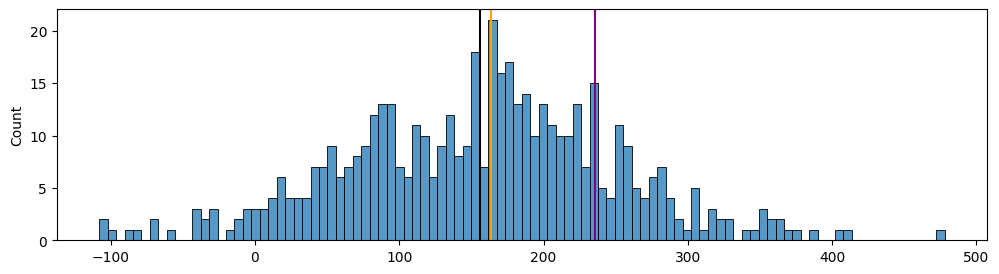

In [ ]:
plt.subplots(figsize=(12, 3))
sns.histplot(arr, bins = 100)
plt.axvline(x = np.median(arr), color = 'orange')
plt.axvline(x=np.mean(arr), color = 'black')
plt.axvline(x=mode, color = 'purple')


In [ ]:
np.median(arr), np.mean(arr), mode

(np.float64(150.0), np.float64(150.102), np.float64(150.0))

# Task_3

Дан массив значений.
* Для всех наблюдений получите массив с отклонениями от среднего. Провизуализируйте его используя написанную ниже функцию.
* Для всех наблюдений найдите сумму отклонений от среднего.

In [ ]:
def div_plot(arr:np.ndarray)-> None:
  plt.subplots(figsize=(13, 5))
  sns.barplot(y=arr, x = np.arange(arr.shape[0]), color = 'g')

In [ ]:
arr = abs(np.random.randn(80))

# Task_4

Перед нами датасет по вторичному рынку автомобилей Кыргызстана. Изучите данные и определите тип каждого признака. (Количественный, номинативный, ранговый)

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/p1x0qh6dwpggxttdi562r/mashina_dataset.csv?rlkey=9tpvw11bsf36loyrzqg2up27q&dl=0'
df = pd.read_csv('mashina_dataset.csv?rlkey=9tpvw11bsf36loyrzqg2up27q&dl=0')
col = ['brand', 'model', 'location', 'views', 'likes',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня',
       'тонировка']
df = df[col]

--2025-07-16 13:22:23--  https://www.dropbox.com/scl/fi/p1x0qh6dwpggxttdi562r/mashina_dataset.csv?rlkey=9tpvw11bsf36loyrzqg2up27q&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4835dabc80d41a91f7d546a851.dl.dropboxusercontent.com/cd/0/inline/CtlSSFv0K_TNqRphgl9CGozJSsNeyUaVMsNMBAI8USAApXR9imCfs6t1z-BfBzFu1BCCH9c8j5pBbYZuzjuqbtdLm4uR3VgmWAKKDJcR8B-o6RjgEFkI9QmAVPRyz7xnRmvEJhqcOUBhoQNPtjCLvSxg/file# [following]
--2025-07-16 13:22:24--  https://uc4835dabc80d41a91f7d546a851.dl.dropboxusercontent.com/cd/0/inline/CtlSSFv0K_TNqRphgl9CGozJSsNeyUaVMsNMBAI8USAApXR9imCfs6t1z-BfBzFu1BCCH9c8j5pBbYZuzjuqbtdLm4uR3VgmWAKKDJcR8B-o6RjgEFkI9QmAVPRyz7xnRmvEJhqcOUBhoQNPtjCLvSxg/file
Resolving uc4835dabc80d41a91f7d546a851.dl.dropboxusercontent.com (uc4835dabc80d41a91f7d546a851.dl.dropboxusercontent.com)... 162.12

In [ ]:
df

,brand,model,location,views,likes,usd_price,price_kgs,Год выпуска,Пробег,Кузов,Цвет,Коробка,Привод,Руль,Состояние,Таможня,тонировка
0,Lexus,LX,Бишкек,2367.0,1.0,88000.0,7730800.0,2015,125000 км,внедорожник 5 дв.,черный,автомат,полный,слева,идеальное,растаможен,1.0
1,Kia,Rio,Бишкек,1005.0,7.0,18500.0,1625225.0,2020,50000 км,седан,серый,автомат,передний,слева,хорошее,растаможен,NaN
2,Toyota,Land Cruiser,Бишкек,666.0,NaN,49500.0,4348575.0,2013,100000 км,внедорожник 5 дв.,черный,автомат,полный,слева,хорошее,растаможен,NaN
3,Lexus,GX,Бишкек,3557.0,6.0,25900.0,2275315.0,2005,180000 км,внедорожник 5 дв.,серебристый,автомат,полный,слева,хорошее,растаможен,NaN
4,Lexus,LX,Бишкек,3744.0,5.0,98000.0,8609300.0,2017,55000 км,внедорожник 5 дв.,белый,автомат,полный,слева,идеальное,растаможен,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Volkswagen,Golf,Бишкек,257.0,NaN,2560.0,225000.0,1994,NaN,хэтчбек 5 дв.,белый,механика,передний,слева,хорошее,не растаможен,NaN
9996,Toyota,Highlander,Бишкек,73.0,NaN,13500.0,1186515.0,2003,246546 км,внедорожник 5 дв.,серебристый,автомат,полный,слева,хорошее,не растаможен,1.0
9997,Nissan,March,Бишкек,505.0,3.0,3413.0,300000.0,2000,200000 км,хэтчбек 5 дв.,синий,вариатор,передний,справа,хорошее,растаможен,NaN
9998,Lexus,LX,Бишкек,191.0,NaN,40000.0,3515600.0,2010,190000 км,внедорожник 5 дв.,серебристый,автомат,полный,слева,хорошее,растаможен,NaN


# Task_5 Ранжирование количественного признака.

Из датасета предыдущего таска мы взяли стоимость первых 100 автомобилей.

* Оцените изменчивость стоимости по минимальному, среднему, медианному и максимальному значениям.
* Получите массив с категориями "economy", "standard" и "premium".
  1. $price < 21000$ - "economy"
  2. $21000 \leq price < 42000$ - "standard"
  3. $price \geq 42000$ - "premium"

  Для этого можете написать свою функцию и векторизовать ее. Об этом подробно рассказано в начале данной лабораторной работы.

* Посчитайте по каждой категории количество наблюдений.

  Для этого используйте код `unique_values, counts = np.unique(data, return_counts=True)`


In [ ]:
def cat(price):
  if price<21000:
    return 'economy'
  elif price <42000:
    return 'standart'
  else:
    return 'premium'


In [ ]:
cat_v = np.vectorize(cat)

In [ ]:
cat_v(price)

array(['premium', 'economy', 'premium', 'standart', 'premium', 'standart',
       'premium', 'premium', 'premium', 'economy', 'standart', 'premium',
       'premium', 'economy', 'standart', 'economy', 'standart', 'premium',
       'premium', 'standart', 'standart', 'premium', 'economy', 'economy',
       'standart', 'economy', 'economy', 'standart', 'premium', 'economy',
       'economy', 'premium', 'standart', 'premium', 'premium', 'premium',
       'economy', 'economy', 'economy', 'economy', 'standart', 'standart',
       'standart', 'premium', 'premium', 'standart', 'premium', 'premium',
       'premium', 'standart', 'standart', 'standart', 'premium',
       'economy', 'economy', 'economy', 'premium', 'economy', 'economy',
       'economy', 'standart', 'premium', 'economy', 'economy', 'premium',
       'standart', 'premium', 'economy', 'standart', 'economy',
       'standart', 'premium', 'standart', 'economy', 'standart',
       'economy', 'economy', 'premium', 'standart', 'premium'

In [ ]:
price = np.array(df.usd_price[:100])
price

array([ 88000.,  18500.,  49500.,  25900.,  98000.,  38000.,  65000.,
        54500., 200000.,  18000.,  35000.,  55000., 115000.,   8200.,
        38500.,  15000.,  25000., 110000., 105000.,  23000.,  36500.,
        44000.,   6800.,  16700.,  23000.,  19000.,  20000.,  31000.,
       125000.,   7800.,  10800.,  50000.,  40000.,  50500.,  45000.,
        86500.,  16300.,   7900.,  15500.,   5300.,  27800.,  31500.,
        36000.,  45000.,  45000.,  31400.,  58000.,  80000., 138000.,
        21000.,  25000.,  31500.,  43500.,  15300.,  15200.,  15000.,
        47000.,  14650.,  16500.,  20500.,  39000.,  46000.,   5800.,
         9500., 120000.,  38000.,  62000.,  15000.,  24500.,  20000.,
        25999.,  58500.,  31500.,   3187.,  29800.,  19000.,   9300.,
        47500.,  32000.,  65000.,  95000.,  34500.,  52000.,  45000.,
        92000.,  26800.,  24000.,   8600.,  21000.,  10000.,  26000.,
        32000.,  22900.,  19700.,  10900.,  24500.,  20500.,  35000.,
        51500.,  230

# Task_6

## Label-encoding.

Этот алгоритм является  способом "векторизации", то есть превращения в числовой вид категориального признака.

In [ ]:
brands = ['Lexus', 'Kia', 'Toyota', 'Nissan']
cars = np.array([brands[np.random.randint(0, 4)] for _ in range(50)])

In [ ]:
cars

array(['Lexus', 'Kia', 'Nissan', 'Lexus', 'Nissan', 'Toyota', 'Toyota',
       'Nissan', 'Kia', 'Toyota', 'Toyota', 'Nissan', 'Nissan', 'Nissan',
       'Nissan', 'Lexus', 'Nissan', 'Nissan', 'Kia', 'Lexus', 'Lexus',
       'Toyota', 'Nissan', 'Kia', 'Nissan', 'Kia', 'Toyota', 'Toyota',
       'Lexus', 'Toyota', 'Toyota', 'Nissan', 'Lexus', 'Kia', 'Lexus',
       'Toyota', 'Kia', 'Kia', 'Toyota', 'Lexus', 'Toyota', 'Nissan',
       'Nissan', 'Toyota', 'Nissan', 'Lexus', 'Nissan', 'Kia', 'Nissan',
       'Toyota'], dtype='<U6')

Перед нами массив с марками авто среди который присутствуют четыре уникальных марки. Получите массив с числами, где каждому бренду будет соответствовать число по образцу:
* Lexus -> 1
* Kia -> 2
* Toyota -> 3
* Nissan -> 4

Это один из самых простых типов векторизации. Но у него есть и минусы. Можно поразмышлять какие. Почему этот алгоритм лучше базировать на частотности значения признака?

In [ ]:
def cars_index(cars):
  if cars=='Lexus':
    return 1.0
  elif cars=='Kia':
    return 2.0
  elif cars=='Toyota':
    return 3.0
  elif cars =='Nissan':
    return 4.0
  else:
    return np.nan
cars_ind = np.vectorize(cars_index)

In [ ]:
po = cars_ind(cars)
po

array([ 3.,  2.,  2.,  2.,  1.,  1.,  2.,  4.,  1.,  2.,  2.,  4.,  4.,
        3.,  3.,  3.,  2.,  3.,  2.,  1.,  2.,  1.,  1.,  2.,  3.,  2.,
        4.,  3.,  3.,  2.,  2.,  3.,  3.,  4.,  1.,  4.,  4.,  2.,  1.,
        3.,  1.,  2.,  2.,  4.,  2.,  2.,  1.,  1.,  3.,  2., nan])

In [ ]:
np.unique(cars)

array(['Kia', 'Lexus', 'Nissan', 'Toyota'], dtype='<U6')

In [ ]:
car_to_num = {v.item():k for k, v in enumerate(np.unique(cars))}
car_to_num

{'Kia': 0, 'Lexus': 1, 'Nissan': 2, 'Toyota': 3}

In [ ]:
cars_to_nums = [car_to_num[car.item()] for car in cars]
cars_to_nums

[1,
 1,
 3,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 2,
 2,
 2,
 1,
 3,
 3,
 1,
 3,
 1,
 0,
 3,
 2,
 1,
 0,
 3,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 2]

# Task_7

Еще один тип векторизации это БИНАРИЗАЦИЯ, называемый также в простонародье One-Hot Encoding. Этот принцип предполагает создание из одного наминативного признака  такое же количество бинарных, каково количество уникальных значений в исходном.

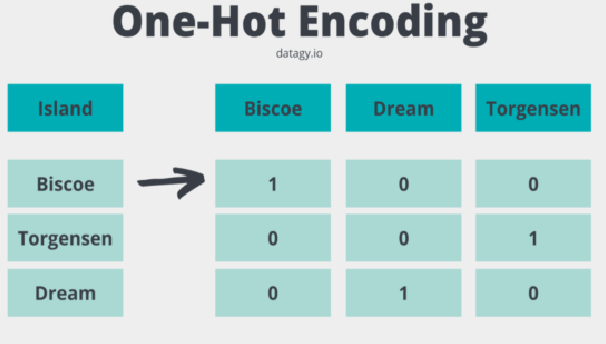

Реализуйте данный подход к массиву "cars" из предыдущего таска.

Не смотря на то, что мы получили 4  новых бинарных признака, мы можем использовать только любые 3. Это соответствует числу "Степеней свободы" этих данных, которое на 1 меньше количества уникальных значений. Как думаете, почему? Этот пример является отличной иллюстрацией такого сложного понятия как степени свободы, с которым мы будем сталкиваться в дальнейшем.

In [ ]:
bin(1), bin(2), bin(10), bin(1000), bin(10000000000)

('0b1',
 '0b10',
 '0b1010',
 '0b1111101000',
 '0b1001010100000010111110010000000000')

In [ ]:
head_list = np.unique(cars)
head_list

array(['Kia', 'Lexus', 'Nissan', 'Toyota'], dtype='<U6')

In [ ]:
matrix = np.zeros((cars.shape[0], len(head_list)))

In [ ]:
car_to_num = {v.item():k for k, v in enumerate(np.unique(cars))}
car_to_num

{'Kia': 0, 'Lexus': 1, 'Nissan': 2, 'Toyota': 3}

In [ ]:
for car, row in zip(cars, matrix):
  row[car_to_num[car]]=1


array([0., 0., 0., 1.])

In [ ]:
matrix

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


In [ ]:
def cat(arr):
  arr =

# Task_8

## Кот и Президент

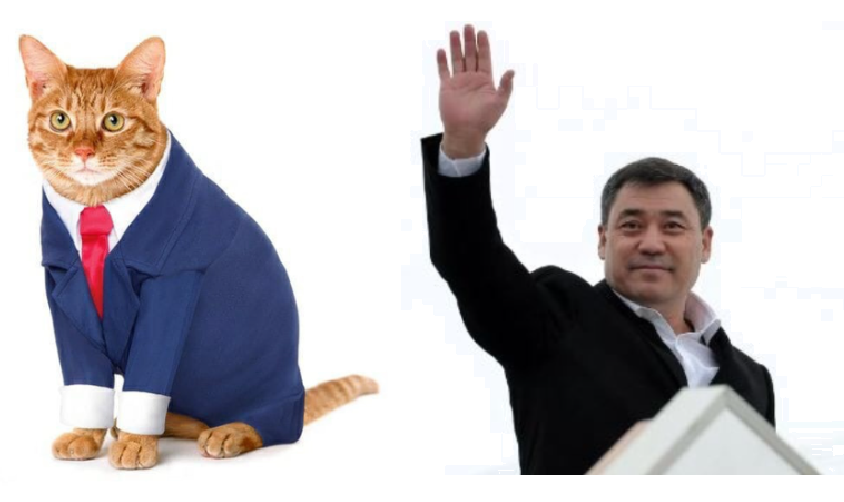

In [ ]:
sentences = [
    "Кот спит на подоконнике.",
    "Мой кот очень ласковый.",
    "Кот поймал серую мышь.",
    "Кот мяукает у двери.",
    "Этот кот любит рыбу.",
    "Кот играет с клубком.",
    "Черный кот перешел дорогу.",
    "Маленький кот любит молоко.",
    "Кот умывается лапкой.",
    "Кот сидит на крыше.",
    "Президент выступил с речью.",
    "Президент посетил фабрику.",
    "Президент обсудил новый закон.",
    "Президент встретился с журналистами.",
    "Президент провел пресс-конференцию.",
    "Президент обсудил экономические вопросы.",
    "Президент встретился с премьер-министром.",
    "Президент подписал международное соглашение.",
    "Президент начал иностранный визит.",
    "Президент провел встречу с советниками.",
    "Кот царапает обои в доме.",
    "Серый кот любит играть.",
    "Мой кот постоянно мурлычет.",
    "Кот ловит птиц на улице.",
    "Кот забрался на дерево.",
    "У соседей очень шумный кот.",
    "Кот заснул в коробке.",
    "Мой кот не любит воду.",
    "Каждое утро кот ждет корм.",
    "Кот смотрит в окно.",
    "Президент анонсировал новую программу.",
    "Президент посетил школу в городе.",
    "Президент выразил свои соболезнования.",
    "Президент обсудил план развития.",
    "Президент участвовал в марафоне.",
    "Президент встретился с предпринимателями.",
    "Президент ознакомился с проектом.",
    "Президент выступил за мир.",
    "Президент пообещал поддержку фермерам.",
    "Президент открыл новый парк.",
    "Белый кот лежал на солнце.",
    "Каждый вечер кот охотился в саду.",
    "Кот умеет открывать двери.",
    "Мой кот всегда мурлыкает, когда счастлив.",
    "Кот испугался громкого шума.",
    "Мой кот любит спать на клавиатуре.",
    "Этот кот всегда выбирает самые теплые места в доме.",
    "Кот прыгнул на стол и опрокинул вазу.",
    "Кот притащил домой игрушку.",
    "У кота голубые глаза.",
    "Президент объявил о новой инициативе.",
    "Президент посетил исторический музей.",
    "Президент выразил свою поддержку спорту.",
    "Президент встретился с зарубежными лидерами.",
    "Президент провел консультации с экспертами.",
    "Президент открыл новый научный центр.",
    "Президент обсудил вопросы экологии.",
    "Президент выступил с обращением к нации.",
    "Президент принял участие в телешоу.",
    "Президент посетил выставку современного искусства.",
    "Кот ловит мяч.",
    "Кот ест рыбу.",
    "Кот спит днем.",
    "Кот играет один.",
    "Кот мурлычет громко.",
    "Кот прыгает высоко.",
    "Кот царапает диван.",
    "Кот бегает быстро.",
    "Кот пьет молоко.",
    "Кот охотится ночью.",
    "Президент подписывает закон.",
    "Президент дает интервью.",
    "Президент проводит встречу.",
    "Президент посещает школу.",
    "Президент критикует решение.",
    "Президент летит за границу.",
    "Президент читает доклад.",
    "Президент встречает гостей.",
    "Президент празднует победу.",
    "Президент осматривает завод."
]

cat = ['Cat' for _ in range(10)]
president = ['President' for _ in range(10)]
label = []
label.extend(cat)
label.extend(president)
label = label*4

Перед нами список из 80 коротких предложения. В 40 из них фигурирует "КОТ" а в остальных "ПРЕЗИДЕНТ", что определяет главное различие в этих предложениях и позволяет их разбить на две группы. Если бы мы хотели процесс группировки автоматизировать, то мы должны были как-то научить компьютер "Увидеть" эти различия. К сожалению, машина не понимает нашу человеческую речь, а значит эти предложения нужно "оцифровать". Самый верный способ - это их векторизовать, то есть каждому предложению поставить в соответствие вектор. Для этого мы воспользуемся популярным инструментом `HashingVectorizer`. Особый интерес именно данного векторизатора в том, что он не понимает семантики наших предложений и делает векторизацию "механически". Логика построена вокруг "уникальных ключей" (слов).

Всего во всех предложениях уникальных слов очень много, и скорее всего, в каждом предложении будут слова, которые не всречаются в других, кроме слов "КОТ" и "ПРЕЗИДЕНТ". Для большей надежности, сделаем вектора подлиннее, предполагая достаточно большое количество уникальных слов в массиве предложений, и каждому предложению поставим в соответствие вектор из 150 компонент.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.manifold import TSNE
vectorizer = HashingVectorizer(n_features=150)
text_vectors = vectorizer.fit_transform(sentences)
vec = text_vectors.toarray()
vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vec[6] # отдельно взятое предложение

array([ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

Но как мы это сможем провизуализировать? Для того, чтобы посмотреть на scatterplot нам желательно иметь 2 признака а не 150. На самом деле мы можем отобрать любые два признака и построить диаграмму, но вряд-ли что-то хорошее мы увидим. (подумайте, почему?)

Давайте 150 признаков приведем к 2 применяя метод снижения размерности матрицы t-SNE. В основе этого метода лежит очень злой ЛИНАЛ, который, надеюсь, вы со временем освоите!

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(vec)

<Axes: >

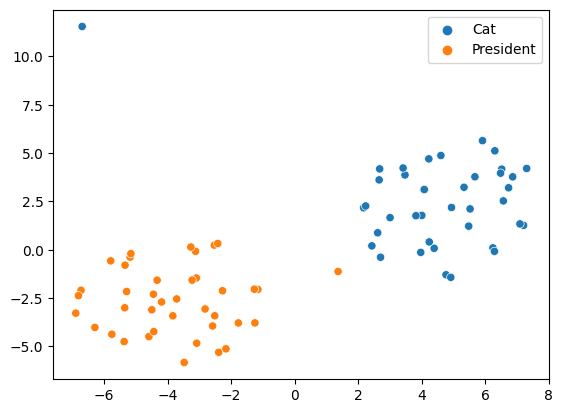

In [ ]:
sns.scatterplot(x=tsne_results[:, 1], y=tsne_results[:, 0], hue = label)

Вывод сделайте сами. Подумайте, какое предложение стало Выбросом на диаграмме! оно весьма очевидно)
